Key Preprocessing Steps Included
1. Text Cleaning:
  Lowercasing, removal of special characters, and excess whitespace as per the report.
2. Tokenization:
  Tokenized the reviews into subwords using the bert-base-uncased tokenizer.
3. Padding and Truncation:
  Reviews are padded or truncated to a fixed length (128 tokens).
4. Attention Masks:
  Automatically generated by the tokenizer to differentiate padding tokens from meaningful input.
5. Encoding Labels:
  Numerical ratings were converted to zero-based indices for compatibility with the classification head.
6. Train-Test Split:
Stratified split ensures that the class distribution is preserved across training and validation subsets.

In [1]:
# Import Libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re
from transformers import BertTokenizer
import torch
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
# Load Dataset
df = pd.read_csv('https://raw.githubusercontent.com/ManassehV2/Univaq-ML-Project/refs/heads/master/data/tripadvisor_hotel_reviews.csv')
# Dataset Overview
print("Dataset shape:", df.shape)
print(df.head())


Dataset shape: (20491, 2)
                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5


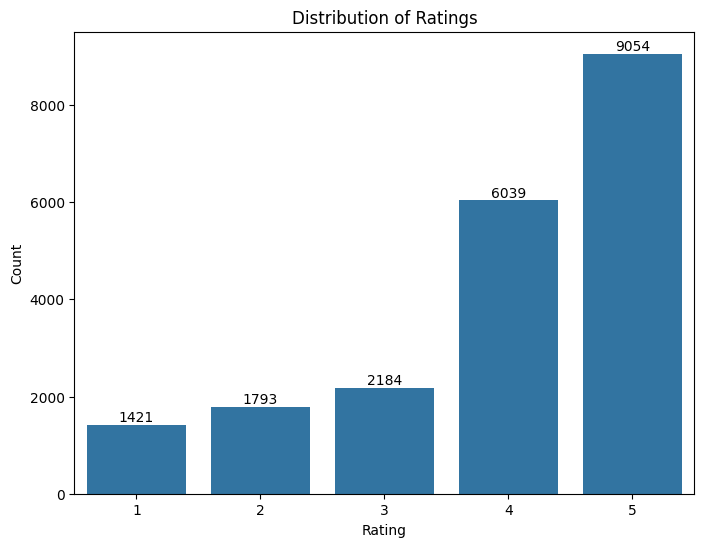

In [3]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df['Rating'])
# Add count on top of the bars
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [4]:
# Preprocessing Function
def preprocess_text(text):
    """
    Preprocesses the text by cleaning and normalizing:
    - Converts text to lowercase
    - Removes special characters and extra whitespaces
    """
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text).strip()  # Remove excessive whitespaces
    return text

# Apply Preprocessing
df['Review'] = df['Review'].apply(preprocess_text)

# View Preprocessed Data
print(df.head())


                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4 experience hotel monaco seatt...       3
3  unique great stay wonderful time hotel monaco ...       5
4  great stay great stay went seahawk game awesom...       5


In [ ]:
# Initialize BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenization Function
def tokenize_reviews(reviews, max_length=128):
    """
    Tokenizes and encodes reviews into BERT-compatible input format.
    - Subword tokenization
    - Truncation to max_length
    - Padding to max_length
    """
    return tokenizer.batch_encode_plus(
        reviews.tolist(),
        max_length=max_length,  # Maximum token length for BERT
        padding="max_length",  # Pad to max length
        truncation=True,  # Truncate long reviews
        return_tensors="pt"  # Return PyTorch tensors
    )

# Tokenize Reviews
tokenized_data = tokenize_reviews(df['Review'])
print("Tokenization complete.")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Encode Labels (1 → 0, 2 → 1, ..., 5 → 4)
df['Rating'] = df['Rating'] - 1  # Convert ratings to 0-indexed
labels = torch.tensor(df['Rating'].values)

print("Labels encoded. Example:", labels[:5])


Labels encoded. Example: tensor([2, 1, 2, 0, 0])


In [ ]:
# Split Data into Training and Validation Sets
train_inputs, val_inputs, train_masks, val_masks, train_labels, val_labels = train_test_split(
    tokenized_data["input_ids"],
    tokenized_data["attention_mask"],
    labels,
    test_size=0.2,  # 20% for validation
    stratify=labels  # Stratified split to maintain class distribution
)

# Save Split Data
torch.save({
    "train_inputs": train_inputs,
    "val_inputs": val_inputs,
    "train_masks": train_masks,
    "val_masks": val_masks,
    "train_labels": train_labels,
    "val_labels": val_labels
}, "preprocessed_data_aug_backtranslation.pt")

print("Train-Test split complete.")


Train-Test split complete.


In [ ]:
# Download Preprocessed Data
from google.colab import files
files.download("preprocessed_data_exp_1.pt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>